# TTT4185 Machine learning for Speech technology

## Computer assigment 1: Speech analysis

This assignment assumes that the student has knowledge about short-time spectral estimation, linear prediction modeling and cepstral analysis. You should also know the concept of fundamental frequencies and formants.

Useful plotting commands from `matplotlib.pyplot`: `figure`, `plot`, `subplots`, `pcolormesh`

### Problem 1

In this problem we will look at a speech signal and do simple spectral analysis on the signal.

(a) Download the speech file `stry.wav` from Blackboard and load the file using `scipy.io.wavefile.read`. The speech represents the latter half of the English word "tapestry". The phonetic transcription is /s/ /t/ /r/ /iy/.
- Plot the signal.
- What is characteristic about the sounds /s/, /t/, /r/ and /iy/?
- Take a 40 millisecond subset of the vowel /iy/ and plot it.
- Find the fundamental frequency $f_0$ of the vowel.

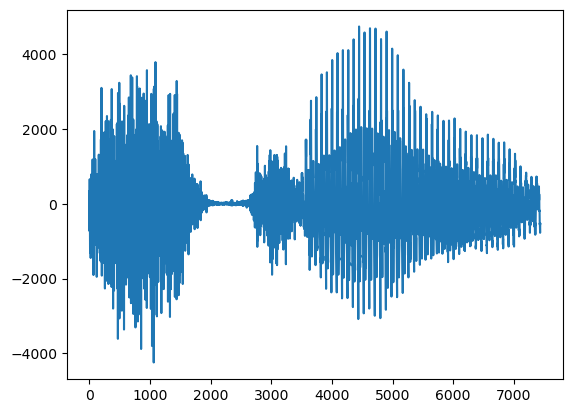

In [2]:
import scipy.io.wavfile
Fs, data = scipy.io.wavfile.read('stry(1).wav')

import matplotlib.pyplot as plt
import scipy as sp

plt.plot(data)
plt.show()

The characteristics about the sound /s/ is that it is fairly long and has a large value.
The sound /t/ is short due to the plosive nature of the sound.
The /r/ is more rounded which gives it a larger value, and it is kind of added into the /iy/ sound.
The /iy/ is a vowel-like sound which slowly 'dies out'.

In [6]:
print(len(data))

7438


Assuming a sampling frequency of 16kHz: 40ms -> 640 samples

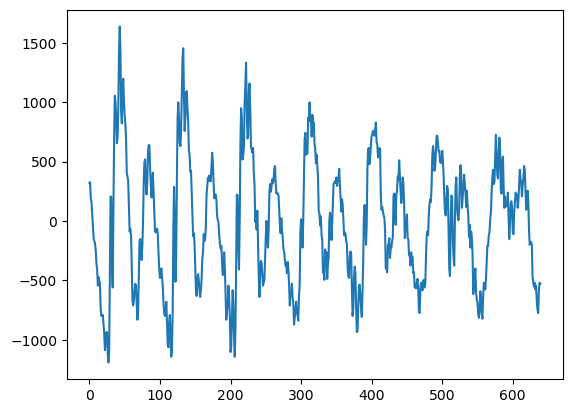

In [32]:
fs = 16000

plt.plot(data[-640:])
plt.show()

The distance between two peaks, which is roughly the period, is approximately 100 samples.
This is equal to a frequency of 1.6kHz - (sampling frequency / samples).
Thus f0 is approximately 1.6kHz.

(b) Spectral analysis
- Estimate the spectrum of the vowel using an FFT of length 1024. Plot the spectrum expressed in dBs ($20 \log_10(x)$) as a function of frequency.
- Multiply the signal by a Hamming window and repeat the last operation.
- Explain the difference between the two spectra.
- Estimate the fundamental frequency $f_0$ using the spectrum, and compare the result to what you got in 1a)
- Roughly estimate the two first formant frequencies.

Useful Python functions: `numpy.fft.fft`, `numpy.abs`, `scipy.signal.hamming`.

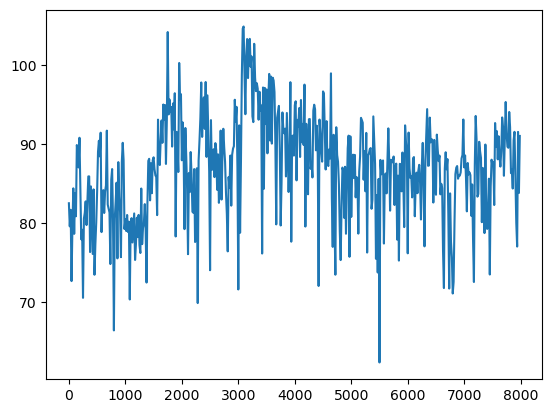

In [18]:
import numpy as np
import scipy as sp

spectrum = np.fft.fft(data, 1024)
freq     = np.fft.fftfreq(1024, 1/fs)
N        = len(spectrum)

plt.plot(freq[:N//2], 20*np.log10(np.abs(spectrum))[:N//2])
plt.show()

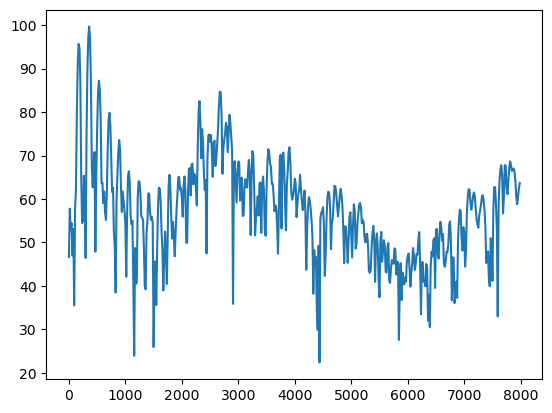

In [25]:
window       = sp.signal.windows.hamming(len(data[-640:]))
dataWindowed = data[-640:]*window

spectrumWindowed = np.fft.fft(dataWindowed, 1024)
freqWindowed     = np.fft.fftfreq(1024, 1/fs)

plt.plot(freqWindowed[:N//2], 20*np.log10(np.abs(spectrumWindowed))[:N//2])
plt.show()

(c) AR modeling
- Compute the coefficients of an AR model (linear prediction coefficients) with order 4, 8, 16 and 50, based on the vowel.
- Estimate the spectrum for each of the model orders. Plot the spectrum in dBs as a function of frequency.
- Compare your results with the spectrum from 1b). Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?
- Why is it not possible to estimate the fundamental frequency based on the LP model?

Useful Python functions: `pysptk.sptk.lpc`, `scipy.signal.freqz`. Check the documentation of the sptk package https://netix.dl.sourceforge.net/project/sp-tk to know which parameters are returned by the `lpc` function, and what model they correspond to.

(d) Use `scipy.signal.spectrogram` to create a spectrogram of the entire speech signal. Try to generate both wide- and narrow-band spectrograms by adjusting the window lengths and overlaps. Which characteristic traits of the speech sounds /s/, /t/, /r/ and /iy/ can you see from the spectrogram?

### Problem 2
In this problem we look at the cepstrum and deconvolution

(a) Compute and plot the real cepstrum of the vowel from problem 1a).

(b) Use the cepstrum to compute the fundamental frequency $f_0$. Compare your results with those obtained in problem 1).

(c) In this subproblem you will use the cepstrum to estimate the spectral envelope
- Use liftering to extract the part of the ceptrum that represents the spectral envelope.
- Plot the spectral envelope as a function of frequency, and compare the result with the results from problem 1).

Hint 1: Remember that the cepstrum of a real signal is symmetric, so the liftered signal mus be symmetric as well.

Hint 2: The FFT of a real, symmtric signal is real, but due to round-off errors small imaginary noise may occur. Use `np.real` to get to the real part of the liftered log-spectrum.